In [1]:
# importing libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\katar\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [78]:
# loading cleaned datasets
customers = pd.read_csv("data interim/customers_train.csv")
districts = pd.read_csv("data_updated/districts.csv")
transactions = pd.read_csv("data interim/transactions_train.csv")

CUSTOMERS TABLE

In [79]:
customers.groupby("LOAN").count()

,Unnamed: 0,CLIENT_ID,ACCOUNT_ID,GENDER,BIRTH_DT,ACTIVE,DISTRICT_ID,AGE
LOAN,,,,,,,,
0.0,2992,2992,2992,2992,2992,2992,2992,2992
1.0,529,529,529,529,529,529,529,529


Approx 17% of customers have a loan. Let's see if there is dependency on GENDER or AGE.

0 LOAN
0.0    0.849765
1.0    0.150235
Name: 0, dtype: float64
1 LOAN
0.0    0.849752
1.0    0.150248
Name: 1, dtype: float64


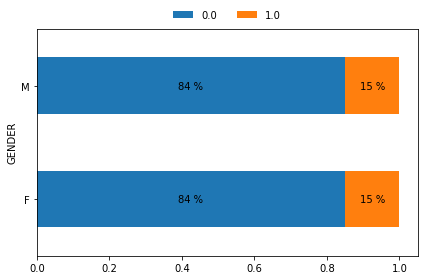

In [80]:
x_var, y_var = "GENDER", "LOAN"
df_grouped = customers.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
#df_grouped = df_grouped.sort_values(by=1.0, ascending=False).head(10)
df_grouped.plot.barh(stacked=True)
plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=3,
)
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    print(ix, row)
    cumulative = 0
    for element in row:
        if element > 0.1:
            plt.text(
                cumulative + element / 2,
                ix,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
            )
        cumulative += element
plt.tight_layout()

Bank is equally likely to grant loans to male and female.

In [81]:
# groupping customers by AGE
customers['AGE_GROUP'] = customers.AGE.round(-1)

0 LOAN
0.0    0.883234
1.0    0.116766
Name: 0, dtype: float64
1 LOAN
0.0    0.824027
1.0    0.175973
Name: 1, dtype: float64
2 LOAN
0.0    0.794483
1.0    0.205517
Name: 2, dtype: float64
3 LOAN
0.0    0.815552
1.0    0.184448
Name: 3, dtype: float64
4 LOAN
0.0    0.823366
1.0    0.176634
Name: 4, dtype: float64
5 LOAN
0.0    0.972881
1.0    0.027119
Name: 5, dtype: float64
6 LOAN
0.0    1.0
1.0    NaN
Name: 6, dtype: float64


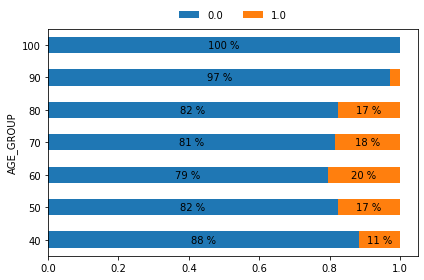

In [82]:
x_var, y_var = "AGE_GROUP", "LOAN"
df_grouped = customers.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
#df_grouped = df_grouped.sort_values(by=1.0, ascending=False).head(10)
df_grouped.plot.barh(stacked=True)
plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=3,
)
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    print(ix, row)
    cumulative = 0
    for element in row:
        if element > 0.1:
            plt.text(
                cumulative + element / 2,
                ix,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
            )
        cumulative += element
plt.tight_layout()

Bank is more likely to have granted a loan to customers between 50-90.

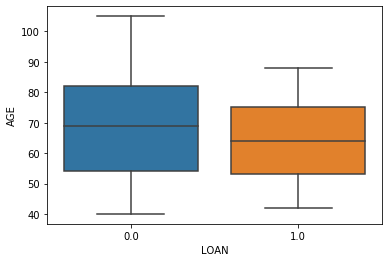

In [83]:
sns.boxplot(data=customers, x="LOAN", y="AGE")

Bank is more likely to have granted a loan to younger customers.

DISTRICTS TABLE

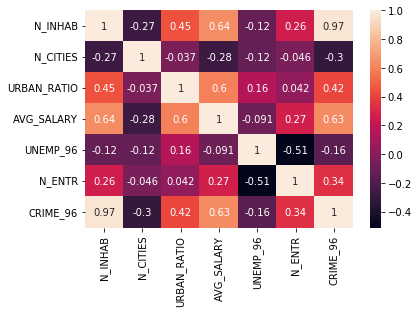

In [84]:
# analysing heatmap
sns.heatmap(districts.loc[:, districts.columns != 'DISTRICT_ID'].corr(), annot=True)


I noticed that UNEMP_95 and CRIME_95 are missing, most likely due to data quality issue.

Observations:
* N_INHAB and CRIME_96 are strongly, positively correlated. I will drop CRIME_96 from further analysis as it's not bringing any value. I will explore CRIMES_PER_INHAB.
* N_INHAB is also positively correlated with URBAN_RATIO, AVG_SALARY and N_ENTR. In districts with higher population we also observe that more people are living in cities, have higher salaries and own businesses.
* N_CITIES is negatively correlated with N_INHAB and AVG_SALARY. If there are many cities in the district, they are most likely small, resulting in small total population.
* N_ENTR and UNEMP_96 are negatively correlated

In [85]:
districts['CRIMES_PER_INHAB'] = districts.CRIME_96.div(sum(districts.N_INHAB))

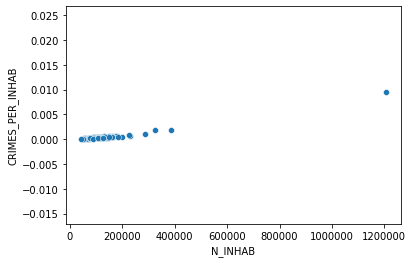

In [86]:
sns.scatterplot(districts,x='N_INHAB',y='CRIMES_PER_INHAB')

In the scatterplot of N_INHAB agaist CRIME_PER_INHAB we can spot a slight positive correlation (more crime in more populated district) and one clar outlier. 

### Representation of customers with a loan in districts.
I will compare distrbution acress DISTRICT_ID of loans granted in the bank to distribution of population across districts. Comparing those two metrics will show me which districts are overrepresented and underrepresented in consumers of loans in our bank. 

In [87]:
# calculating % of total loans for all DISTRICS_IDs among customers
distr_loans = customers.groupby('DISTRICT_ID').agg({'LOAN':['sum']})
distr_loans.columns = distr_loans.columns.get_level_values(1)
distr_loans['perc'] = distr_loans['sum'].div(distr_loans['sum'].sum())

0 LOAN
0.0    0.756098
1.0    0.243902
Name: 0, dtype: float64
1 LOAN
0.0    0.756098
1.0    0.243902
Name: 1, dtype: float64
2 LOAN
0.0    0.756757
1.0    0.243243
Name: 2, dtype: float64
3 LOAN
0.0    0.767442
1.0    0.232558
Name: 3, dtype: float64
4 LOAN
0.0    0.780488
1.0    0.219512
Name: 4, dtype: float64
5 LOAN
0.0    0.782609
1.0    0.217391
Name: 5, dtype: float64
6 LOAN
0.0    0.783784
1.0    0.216216
Name: 6, dtype: float64
7 LOAN
0.0    0.789474
1.0    0.210526
Name: 7, dtype: float64
8 LOAN
0.0    0.791045
1.0    0.208955
Name: 8, dtype: float64
9 LOAN
0.0    0.794118
1.0    0.205882
Name: 9, dtype: float64


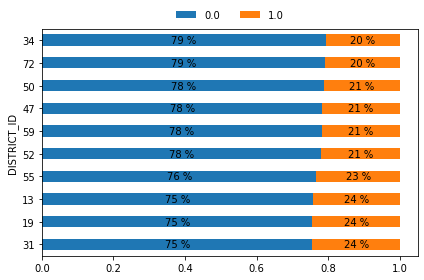

In [88]:
x_var, y_var = "DISTRICT_ID", "LOAN"
df_grouped = customers.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped = df_grouped.sort_values(by=1.0, ascending=False).head(10)
df_grouped.plot.barh(stacked=True)
plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=3,
)
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    print(ix, row)
    cumulative = 0
    for element in row:
        if element > 0.1:
            plt.text(
                cumulative + element / 2,
                ix,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
            )
        cumulative += element
plt.tight_layout()

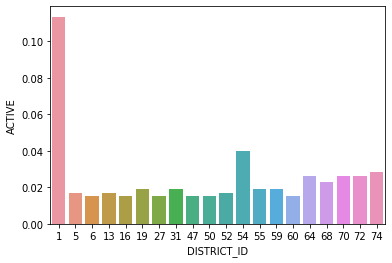

In [89]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
temp = customers[customers.LOAN==1].groupby('DISTRICT_ID').sum().div(customers.LOAN.sum())

temp.reset_index(inplace=True)

temp = temp.sort_values(by='ACTIVE', ascending=False).head(20)

#create pie chart
sns.barplot(temp, x='DISTRICT_ID', y = 'ACTIVE')

In [90]:
# calculation % of total population for all DISTRICT_IDs
districts['PERC_INHAB'] = districts.N_INHAB.div(districts.N_INHAB.sum())

In [91]:
districts = districts.merge(distr_loans, on='DISTRICT_ID')

In [92]:
districts['prefered_districts'] = districts.perc > districts.PERC_INHAB

In [93]:
districts.head()

,DISTRICT_ID,N_INHAB,N_CITIES,URBAN_RATIO,AVG_SALARY,UNEMP_95,UNEMP_96,N_ENTR,CRIME_95,CRIME_96,CRIMES_PER_INHAB,PERC_INHAB,sum,perc,prefered_districts
0,1,1204953,1,100.0,12541,0.29,0.43,167,85677,99107,0.009614,0.116882,60.0,0.113422,False
1,2,88884,5,46.7,8507,1.67,1.85,132,2159,2674,0.000259,0.008622,6.0,0.011342,True
2,3,75232,5,41.7,8980,1.95,2.21,111,2824,2813,0.000273,0.007298,6.0,0.011342,True
3,4,149893,6,67.4,9753,4.64,5.05,109,5244,5892,0.000572,0.014540,2.0,0.003781,False
4,5,95616,6,51.4,9307,3.85,4.43,118,2616,3040,0.000295,0.009275,9.0,0.017013,True


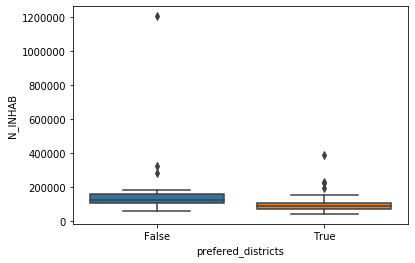

In [95]:
sns.boxplot(data=districts, x="prefered_districts", y="N_INHAB")

One outlier district is impacting boxplot, I will remove it from analysis.

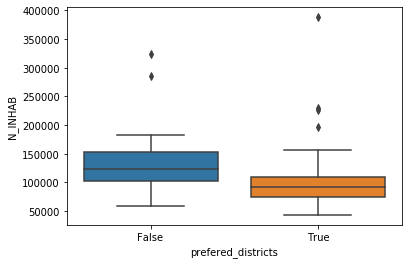

In [96]:
sns.boxplot(data=districts[~districts.DISTRICT_ID.isin([1])], x="prefered_districts", y="N_INHAB")

Bank is more likely to grant a loan to citizen of smaller districts.

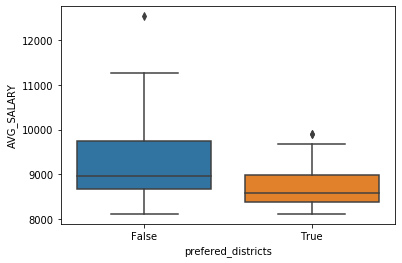

In [97]:
sns.boxplot(data=districts, x="prefered_districts", y="AVG_SALARY")

Bank is more likely to grant a loan to person with lower salary. I have also analyzed other features, but none have diven a clear distinction on tagert variable.

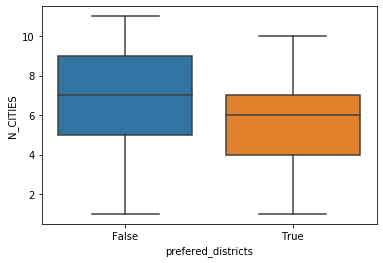

In [98]:
sns.boxplot(data=districts, x="prefered_districts", y="N_CITIES")

Preferred customers from districts with lowe number of cities.

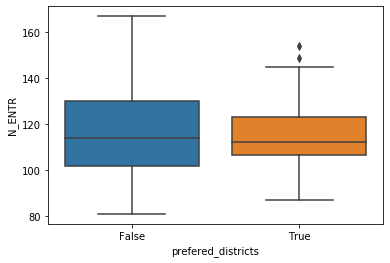

In [20]:
sns.boxplot(data=districts, x="prefered_districts", y="N_ENTR")

No visible correlation on number of enterpreneurs.

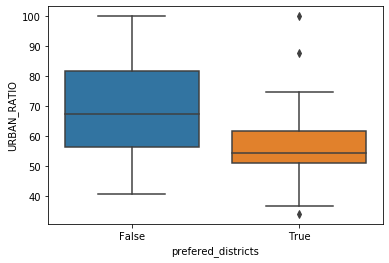

In [99]:
sns.boxplot(data=districts, x="prefered_districts", y="URBAN_RATIO")

Preferred customers with lower URBAN_RATIO, however there are some outliers.

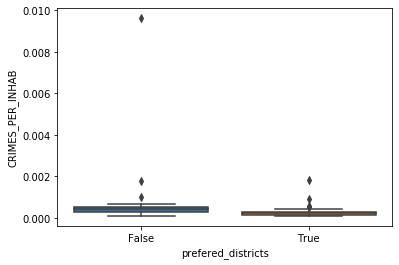

In [100]:
sns.boxplot(data=districts, x="prefered_districts", y="CRIMES_PER_INHAB")

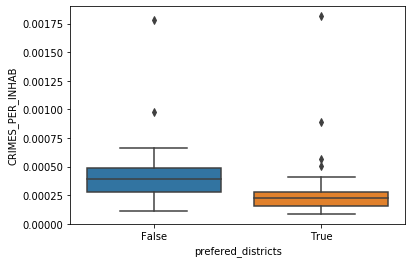

In [102]:
sns.boxplot(data=districts[~districts.DISTRICT_ID.isin([1])], x="prefered_districts", y="CRIMES_PER_INHAB")

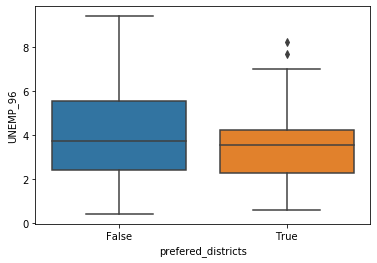

In [103]:
sns.boxplot(data=districts, x="prefered_districts", y="UNEMP_96")

In [ ]:
Slighly negative correlation with unemployment rate.

TRANSACTIONS TABLE

In [137]:
# cleaning DATE
def add_zero(a):
    if len(a) == 7:
        a = '0' + a
    return a

In [141]:
transactions['DATE2'] = [dt.strptime(add_zero(str(x)), '%d%m%Y') for x in transactions.DATE]
transactions['YEAR'] = [x.year for x in transactions.DATE2]
transactions['MONTH'] = [x.month for x in transactions.DATE2]
transactions.YEAR.unique()

array([1993, 1994, 1995, 1996, 1997, 1998], dtype=int64)

Transactions in years 1993-1998

In [176]:
transactions_agg = transactions.groupby(['ACCOUNT_ID','YEAR','MONTH','TYPE']).agg({'AMOUNT':{'sum'}})
transactions_agg.columns = transactions_agg.columns.get_level_values(1)
transactions_agg.reset_index()

,ACCOUNT_ID,YEAR,MONTH,TYPE,sum
0,1.0,1995,3,CREDIT,1000.0
1,1.0,1995,4,CREDIT,16298.2
2,1.0,1995,5,CREDIT,5858.0
3,1.0,1995,6,CREDIT,3779.6
4,1.0,1995,6,WITHDRAWAL,200.0
...,...,...,...,...,...
278327,11382.0,1998,10,WITHDRAWAL,32014.6
278328,11382.0,1998,11,CREDIT,31251.1
278329,11382.0,1998,11,WITHDRAWAL,18914.6
278330,11382.0,1998,12,CREDIT,46860.4


In [177]:
transactions_agg = transactions_agg.groupby(['ACCOUNT_ID','TYPE']).agg({'sum':{'mean'}})
transactions_agg.columns = transactions_agg.columns.get_level_values(1)
transactions_agg.reset_index()

,ACCOUNT_ID,TYPE,mean
0,1.0,CREDIT,4224.358696
1,1.0,WITHDRAWAL,4205.906977
2,2.0,CREDIT,22206.774648
3,2.0,WITHDRAWAL,22527.910145
4,5.0,CREDIT,4874.250000
...,...,...,...
7037,11359.0,WITHDRAWAL,28165.494118
7038,11362.0,CREDIT,17545.402564
7039,11362.0,WITHDRAWAL,17342.156757
7040,11382.0,CREDIT,32985.817073


In [178]:
transactions_agg_p = transactions_agg.pivot_table(index=['ACCOUNT_ID'], columns= ['TYPE'], values=['mean'])
transactions_agg_p.fillna(0)
transactions_agg_p.columns = transactions_agg_p.columns.get_level_values(1)
transactions_agg_p['TURNOVER'] = transactions_agg_p.CREDIT + transactions_agg_p.WITHDRAWAL
# add target variable
transactions_agg_p = transactions_agg_p.merge(customers[['ACCOUNT_ID','LOAN']], on='ACCOUNT_ID')

In [188]:
transactions_agg_p.head()

,ACCOUNT_ID,CREDIT,WITHDRAWAL,TURNOVER,LOAN
0,1.0,4224.358696,4205.906977,18.451719,0.0
1,2.0,22206.774648,22527.910145,-321.135497,1.0
2,5.0,4874.250000,4626.426667,247.823333,0.0
3,6.0,6684.951923,6381.595745,303.356178,0.0
4,7.0,24241.073077,22470.880000,1770.193077,0.0


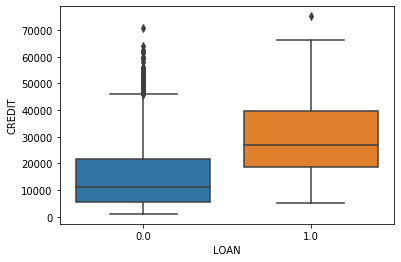

In [189]:
sns.boxplot(data=transactions_agg_p, x="LOAN", y="CREDIT")

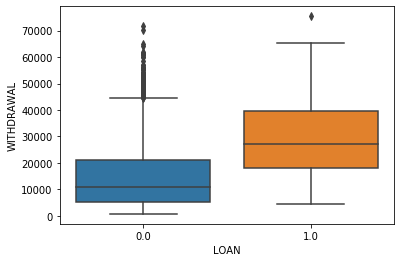

In [191]:
sns.boxplot(data=transactions_agg_p, x="LOAN", y="WITHDRAWAL")

Bank is more likely to give a loan to customers with higher turnover.

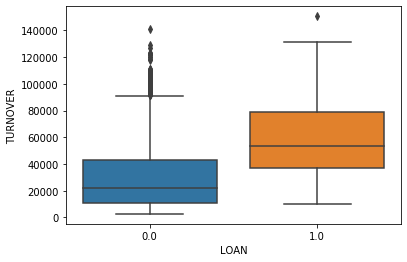

In [197]:
sns.boxplot(data=transactions_agg_p, x="LOAN", y="TURNOVER")

Possible further steps:
* analyze OPERATION is simmilar manner, to see correlation with taget variable
* perform segmentation based on transactional data, label of segmentation could be possible features for predicting model